# ОИАД. Лабораторная работа №2

# Библиотеки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобика данных по формулам:
1) N % 5
2) $N^2$ % 5 + 5
где $N$ - номер в списке

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/poluzerovT/oiad-2-2025/master/datasets/students_simple.csv"

df = pd.read_csv(url)
display(df)


,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5
5,164,58,290,98,16,20,2.828,14,6,10.0
6,166,51,480,109,90,26,3.255,78,9,7.2
7,169,62,610,120,24,19,2.726,10,5,4.2
8,170,70,840,122,48,30,2.429,130,10,3.5
9,170,72,330,92,24,20,2.361,20,3,9.5


In [3]:
df.columns[2]

'income'

In [4]:
number: int = 15
num_first_column: int = number % 5
num_second_column: int = number ** 2 % 5 + 5
first_column: str = df.columns[num_first_column]
second_column: str = df.columns[num_second_column]
print(f"Первая колонка:\n    Номер: {num_first_column}\n    Название: {first_column}\nВторая колонка:\n    Номер: {num_second_column}\n    Название: {second_column}")

Первая колонка:
    Номер: 0
    Название: height
Вторая колонка:
    Номер: 5
    Название: age


In [5]:
my_df = df.iloc[:, [num_first_column, num_second_column]]
display(my_df)

,height,age
0,159,20
1,160,25
2,161,28
3,162,19
4,162,23
5,164,20
6,166,26
7,169,19
8,170,30
9,170,20


## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

In [6]:
def corr_fechner(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Compute Fechner correlation
    """
    X: np.array = df[first_column].to_numpy()
    Y: np.array = df[second_column].to_numpy()
    mean_X: float = np.mean(X)
    mean_Y: float = np.mean(Y)
    n_samples: int = X.shape[0] ** 2
    num_pos: int = 0
    num_neg: int = 0
    for x in X:
        for y in Y:
            if (x - mean_X) * (y - mean_Y) > 0:
                num_pos += 1
            elif (x - mean_X) * (y - mean_Y) < 0:
                num_neg += 1
    return (num_pos - num_neg) / n_samples

In [7]:
print(f"Корреляция Фехнера между {first_column} и {second_column}: {corr_fechner(my_df, first_column, second_column)}")

Корреляция Фехнера между height и age: 0.0


In [8]:
def corr_pearson(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Compute Pearson correlation
    """
    X: np.array = df[first_column].to_numpy()
    Y: np.array = df[second_column].to_numpy()
    mean_X: float = np.mean(X)
    mean_Y: float = np.mean(Y)
    corr: float = np.sum((X - mean_X) * (Y - mean_Y))
    norm_corr: float = np.sqrt(np.sum((X - mean_X) ** 2) * np.sum((Y - mean_Y) ** 2))
    return corr / norm_corr

In [9]:
print(f"Корреляция Пирсона между {first_column} и {second_column}: {corr_pearson(my_df, first_column, second_column)}")

Корреляция Пирсона между height и age: 0.19437455140867985


In [10]:
def confidence_interval(df: pd.DataFrame, first_column: str, second_column: str, confidence_level: float = 0.95) -> tuple[float, float]:
    """
    Computer Pearson confidence interval
    """
    corr: float = corr_pearson(df, first_column, second_column)
    num_samples: int = df[first_column].shape[0]
    z_trans: float = np.log((1 + corr) / (1 - corr)) / 2
    stand_err: float = 1 / np.sqrt(num_samples - 3)
    z_crit: float = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    z_low: float = z_trans - z_crit * stand_err
    z_high: float = z_trans + z_crit * stand_err
    left_bouder: float = (np.exp(2 * z_low) - 1) / (np.exp(2 * z_low) + 1)
    right_bouder: float = (np.exp(2 * z_high) - 1) / (np.exp(2 * z_high) + 1)
    return (left_bouder, right_bouder)

In [11]:
confidence_level: float = 0.95
left_bound, right_bound = confidence_interval(my_df, first_column, second_column, confidence_level)
print(f"{confidence_level}% доверительный интервал: [{left_bound:.3f}, {right_bound:.3f}]")

0.95% доверительный интервал: [-0.271, 0.586]


In [12]:
def corr_spearman(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Computer Spearman correlation
    """
    X: np.array = df[first_column].to_numpy()
    n_samples: int = X.shape[0]
    X_position: np.array = np.array([x for x in range(n_samples)])
    X_stack = np.vstack((X, X_position)).T

    Y: np.ndarray = df[second_column].to_numpy()
    Y_position: np.ndarray= np.array([x for x in range(n_samples)])
    Y_stack = np.vstack((Y, Y_position)).T

    X_stack = X_stack[X_stack[:, 0].argsort()]
    Y_stack = Y_stack[Y_stack[:, 0].argsort()]

    rank: np.array = np.array([x + 1 for x in range(n_samples)])
    X_pos_rank: np.ndarray = np.column_stack((X_stack, rank))
    Y_pos_rank: np.ndarray = np.column_stack((Y_stack, rank))

    X_pos_rank = X_pos_rank[X_pos_rank[:, 1].argsort()]
    Y_pos_rank = Y_pos_rank[Y_pos_rank[:, 1].argsort()]

    diff_rank: np.array = X_pos_rank[:, 2] - Y_pos_rank[:, 2]
    norm_coef_spearman: float = n_samples * (n_samples ** 2 - 1)

    return 1 - 6 * np.sum(diff_rank ** 2) / norm_coef_spearman

In [13]:
print(f"Корреляция Спирмена между {first_column} и {second_column}: {corr_spearman(my_df, first_column, second_column)}")

Корреляция Спирмена между height и age: 0.1969924812030075


In [14]:
def corr_kendall(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Computer Kendall correlation
    """
    X: np.array = df[first_column].to_numpy()
    n_samples: int = X.shape[0]
    Y: np.ndarray = np.array(df[second_column])
    n_pos: int = 0
    n_neg: int = 0
    for j in range(n_samples):
        for i in range(j):
            if (X[i] - X[j]) * (Y[i] - Y[j]) > 0:
                n_pos += 1
            elif (X[i] - X[j]) * (Y[i] - Y[j]) < 0:
                n_neg += 1
    norm_coef: float = n_samples * (n_samples - 1) / 2
    return (n_pos - n_neg) / norm_coef

In [15]:
print(f"Корреляция Кенделла между {first_column} и {second_column}: {corr_kendall(my_df, first_column, second_column)}")

Корреляция Кенделла между height и age: 0.11578947368421053


## Выводы

1. Корреляция Фехнера = 0.0

Корреляция Фехнера просто сравнивает направление отклонений (+/−) относительно средних значений.

Значение 0.0 говорит о полном балансе положительных и отрицательных совпадений знаков — то есть, тенденция зависимости по знаку не выражена.

2. Корреляция Пирсона = 0.19437455140867985

0.95% доверительный интервал: [-0.271, 0.586]

Положительная корреляция.

3. Корреляция Спирмена = 0.1969924812030075

Спирмен оценивает монотонную (не обязательно линейную) зависимость.

Значение близкое к корреляции Пирсона подтверждает, что зависимость приблизительно монотонная.



4. Корреляция Кенделла = 0.11578947368421053

Это ещё один ранговый коэффициент, более «робастный» (устойчив к выбросам).

Значение 0.11578947368421053 подтверждает те же тенденции, что и Спирмен, только в более сжатой шкале.

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

In [16]:
def print_hist_column(column: str, df: pd.DataFrame, bins: int = 20, color: str = 'skyblue') -> None:
    if column not in df.columns:
        print(f"Error: Column '{column}' not found in DataFrame.")
        return
    data = df[column]
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins, color=color, edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

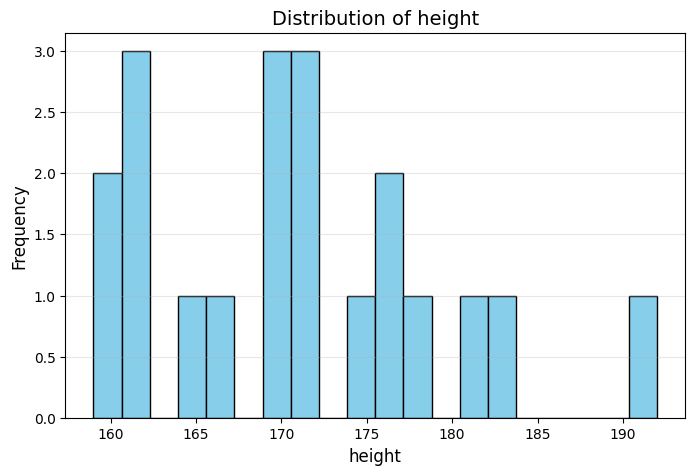

In [17]:
print_hist_column(first_column, my_df)

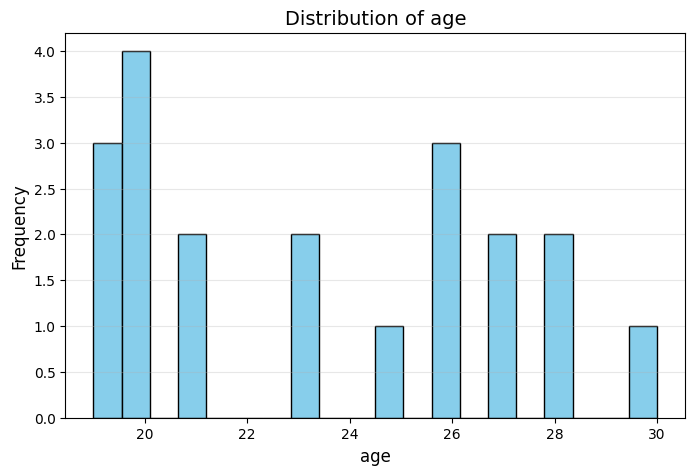

In [18]:
print_hist_column(second_column, my_df)

In [19]:
def print_scatter(df: pd.DataFrame, x_col: str, y_col: str, fig_size: tuple[int, int] = (8, 6)) -> None:
    """
    Plots a scatter plot for two numeric features from the given DataFrame.

    The scatter plot visualizes the relationship between two variables,
    helping to identify potential linear or nonlinear correlations and outliers.

    :param df: DataFrame containing numeric features
    :param x_col: Name of the column to plot on the X-axis
    :param y_col: Name of the column to plot on the Y-axis
    :param fig_size: Tuple specifying figure size in inches (default = (8, 6))
    :return: None
    """
    plt.figure(figsize=fig_size)
    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        color="steelblue",
        edgecolor="white",
        s=70,
        alpha=0.7
    )

    plt.title(f"Scatter Plot: {x_col} vs {y_col}", fontsize=14, fontweight="bold", pad=12)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

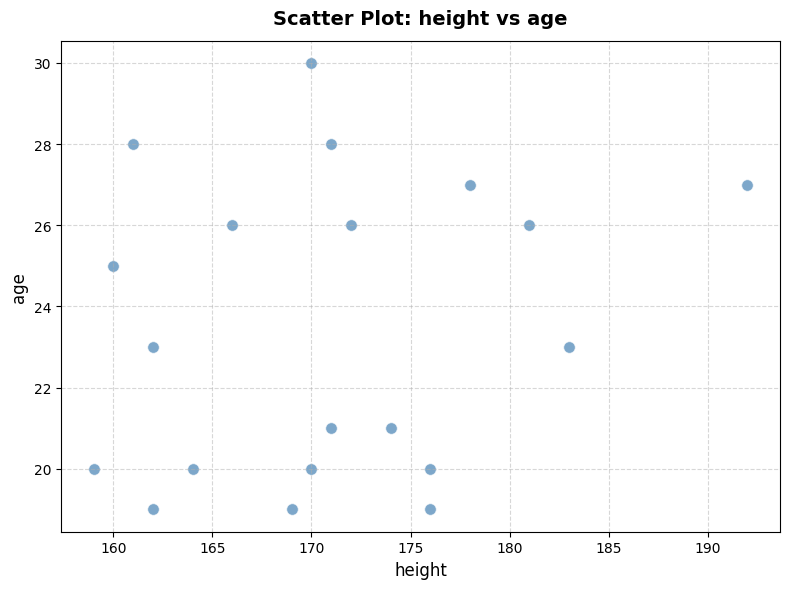

In [20]:
print_scatter(my_df, first_column, second_column)

Гистограммы позволяют оценить распределение значений выбранных признаков и возможные выбросы.

График рассеяния показывает взаимосвязь между признаками.
Если точки группируются вдоль прямой линии, можно предположить наличие линейной корреляции.

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$
4. показательная, $y = w_1^x \cdot w_0$

In [21]:
x: np.array = df[first_column].to_numpy()
y: np.array = df[second_column].to_numpy()

In [22]:
w1, w0 = np.polyfit(x, y, 1)
print(f"Коэффициенты линейной регрессии: w1 = {w1:.4f}, w0 = {w0:.4f}")
print(f"Уравнение: y = {w1:.4f} * x + {w0:.4f}")

Коэффициенты линейной регрессии: w1 = 0.0823, w0 = 9.3470
Уравнение: y = 0.0823 * x + 9.3470


In [23]:
w2, w1, w0 = np.polyfit(x, y, 2)
print(f"Коэффициенты квадратичной регрессии: w2 = {w2:.4f}, w1 = {w1:.4f}, w0 = {w0:.4f}")
print(f"Уравнение: y = {w2:.4f} * x ^ 2 + {w1:.4f} * x + {w0:.4f}")

Коэффициенты квадратичной регрессии: w2 = 0.0053, w1 = -1.7715, w0 = 169.6891
Уравнение: y = 0.0053 * x ^ 2 + -1.7715 * x + 169.6891


In [24]:
w1, w0 = np.polyfit(1 / x, y, 1)
print(f"Коэффициенты гиперболической регрессии: w1 = {w1:.4f}, w0 = {w0:.4f}")
print(f"Уравнение: y = {w1:.4f} / x + {w0:.4f}")

Коэффициенты гиперболической регрессии: w1 = -2351.7113, w0 = 37.1970
Уравнение: y = -2351.7113 / x + 37.1970


In [25]:
# ln(y) = ln(w0) + x * ln(w1)
mask = y > 0
x_safe = x[mask]
y_safe = y[mask]

ln_y = np.log(y_safe)

w1_log, w0_log = np.polyfit(x_safe, ln_y, 1)

w0 = np.exp(w0_log)
w1 = np.exp(w1_log)

print(f"Коэффициенты показательной регрессии: w0 = {w0:.4f}, w1 = {w1:.4f}")
print(f"Уравнение: y = {w0:.4f} * {w1:.4f}^x")

Коэффициенты показательной регрессии: w0 = 12.4755, w1 = 1.0036
Уравнение: y = 12.4755 * 1.0036^x




### **Вывод**

В ходе выполнения задания были построены четыре вида уравнений регрессии с использованием метода наименьших квадратов:

1. **Линейная регрессия:**
   ( y = 0.0823x + 9.3470 )
   — наблюдается слабая положительная зависимость между переменными.

2. **Квадратичная регрессия:**
   ( y = 0.0053x^2 - 1.7715x + 169.6891 )
   — учитывает возможную нелинейность, может лучше описывать данные при наличии изгиба в графике.

3. **Гиперболическая регрессия:**
   ( y = \frac{-2351.7113}{x} + 37.1970 )
   — показывает обратную зависимость: при увеличении (x) значения (y) уменьшаются и стабилизируются около константы.

4. **Показательная регрессия:**
   ( y = 12.4755 \cdot 1.0036^x )
   — отображает слабый рост (y) при увеличении (x).

Сравнивая визуально графики (при их построении), можно сделать вывод, что **линейная и показательная модели** лучше описывают общую тенденцию данных, тогда как **гиперболическая** модель подходит хуже.



## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие модели данным с помощью критерия Фишера

##  Алгоритм проверки уравнения регрессии (критерий Фишера)

1. **Вычислить среднее значение:**
   $ \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i $

2. **Вычислить суммы квадратов:**
   - **Общая дисперсия:**
     $ S_t = \sum (y_i - \bar{y})^2 $
   - **Объяснённая регрессией:**
     $ S_r = \sum (\hat{y}_i - \bar{y})^2 $
   - **Остаточная (ошибки):**
     $ S_e = \sum (y_i - \hat{y}_i)^2 $

3. **Вычислить наблюдаемое значение критерия Фишера:**
   $ F = \frac{S_r / k}{S_e / (n - k - 1)} $

   где  
   $ n $ — количество наблюдений,  
   $ k $ — число коэффициентов модели (без свободного члена).

4. **Найти критическое значение:**
   $ F_{\text{кр}} = F_{1 - \alpha}(k, n - k - 1) $

   (по таблице распределения Фишера при уровне значимости $ \alpha = 0.05 $)

5. **Сделать вывод:**
   - Если $ F > F_{\text{кр}} $ → **модель значима**  
   - Если $ F \le F_{\text{кр}} $ → **модель незначима**



In [26]:
def fisher_test(x: np.ndarray, y: np.ndarray, y_pred: np.ndarray, k: int, model_name: str):
    n = len(x)
    y_mean = np.mean(y)

    S_t = np.sum((y - y_mean) ** 2)
    S_r = np.sum((y_pred - y_mean) ** 2)
    S_e = np.sum((y - y_pred) ** 2)

    F = (S_r / k) / (S_e / (n - k - 1))
    F_crit = stats.f.ppf(0.95, k, n - k - 1)

    print(f"{model_name}")
    print(f"F = {F:.3f}, F_кр = {F_crit:.3f}")
    if F > F_crit:
        print("Модель значима (хорошо описывает данные)")
    else:
        print("Модель незначима (плохое соответствие данным)")
    print("-" * 60)
    return F, F_crit

In [27]:
w1, w0 = np.polyfit(x, y, 1)
y_pred_lin = w1 * x + w0
F, F_crit = fisher_test(x, y, y_pred_lin, k=1, model_name="Линейная модель")

Линейная модель
F = 0.707, F_кр = 4.414
Модель незначима (плохое соответствие данным)
------------------------------------------------------------


In [28]:
w2, w1, w0 = np.polyfit(x, y, 2)
y_pred_quad = w2 * x**2 + w1 * x + w0
F, F_crit = fisher_test(x, y, y_pred_quad, k=2, model_name="Квадратичная модель")

Квадратичная модель
F = 0.503, F_кр = 3.592
Модель незначима (плохое соответствие данным)
------------------------------------------------------------


In [29]:
w1, w0 = np.polyfit(1 / x, y, 1)
y_pred_hyp = w1 / x + w0
F, F_crit = fisher_test(x, y, y_pred_hyp, k=1, model_name="Гиперболическая модель")

Гиперболическая модель
F = 0.647, F_кр = 4.414
Модель незначима (плохое соответствие данным)
------------------------------------------------------------


In [30]:
ln_y = np.log(y)
b, a = np.polyfit(x, ln_y, 1)
w1, w0 = np.exp(b), np.exp(a)
y_pred_exp = w0 * (w1 ** x)
F, F_crit = fisher_test(x, y, y_pred_exp, k=1, model_name="Показательная модель")

Показательная модель
F = 0.838, F_кр = 4.414
Модель незначима (плохое соответствие данным)
------------------------------------------------------------


Вывод

Для всех четырёх видов регрессионных моделей (линейной, квадратичной, гиперболической и показательной) была проведена проверка значимости уравнений с использованием критерия Фишера при уровне значимости

α=0.05.

Результаты показали, что во всех случаях наблюдаемое значение критерия

F меньше критического
F
кр
.
Это означает, что различия между объяснённой и остаточной дисперсией статистически незначимы,
а следовательно, построенные модели не описывают достоверную зависимость между переменными.

На основании анализа можно сделать вывод, что:

зависимость между выбранными переменными либо очень слабая,

либо данные содержат сильный шум,

либо для описания связи требуется иная (нелинейная или составная) модель.

Таким образом, ни одна из исследованных моделей не является статистически значимой, и для более точного описания зависимости следует провести дополнительный анализ данных (например, нормализацию, удаление выбросов или подбор другой формы регрессии).

# 5. Все графики

In [31]:
def plot_regressions(df: pd.DataFrame, x_col: str, y_col: str, fig_size: tuple[int, int] = (8, 6)) -> None:
    """
    Plots a scatter plot with four types of regression lines:
    linear, quadratic, hyperbolic, and exponential.

    The function visualizes the relationship between two numeric variables
    and overlays different regression models to compare their fit.
    """
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values

    x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

    plt.figure(figsize=fig_size)
    sns.scatterplot(data=df, x=x_col, y=y_col, color="steelblue", edgecolor="white", s=70, alpha=0.7)

    lin_reg = LinearRegression()
    lin_reg.fit(x, y)
    y_pred_lin = lin_reg.predict(x_range)
    plt.plot(x_range, y_pred_lin, label=f"Линейная: y = {lin_reg.coef_[0]:.3f}x + {lin_reg.intercept_:.3f}", linewidth=2)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    x_poly = poly.fit_transform(x)
    quad_reg = LinearRegression()
    quad_reg.fit(x_poly, y)
    y_pred_quad = quad_reg.predict(poly.transform(x_range))
    plt.plot(x_range, y_pred_quad, label=f"Квадратичная: y = {quad_reg.coef_[1]:.3f}x² + {quad_reg.coef_[0]:.3f}x + {quad_reg.intercept_:.3f}", linewidth=2)

    mask = x.flatten() != 0
    x_hyp = (1 / x[mask]).reshape(-1, 1)
    y_hyp = y[mask]
    hyp_reg = LinearRegression()
    hyp_reg.fit(x_hyp, y_hyp)
    y_pred_hyp = hyp_reg.predict(1 / x_range)
    plt.plot(x_range, y_pred_hyp, label=f"Гиперболическая: y = {hyp_reg.coef_[0]:.3f}/x + {hyp_reg.intercept_:.3f}", linewidth=2)

    mask = y > 0
    x_exp = x[mask]
    y_exp = np.log(y[mask])
    exp_reg = LinearRegression()
    exp_reg.fit(x_exp, y_exp)
    w1 = np.exp(exp_reg.coef_[0])
    w0 = np.exp(exp_reg.intercept_)
    y_pred_exp = w0 * (w1 ** x_range)
    plt.plot(x_range, y_pred_exp, label=f"Показательная: y = {w0:.3f}·({w1:.3f})^x", linewidth=2)

    plt.title(f"Регрессии для {x_col} vs {y_col}", fontsize=14, fontweight="bold", pad=12)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(fontsize=9)
    plt.tight_layout()
    plt.show()

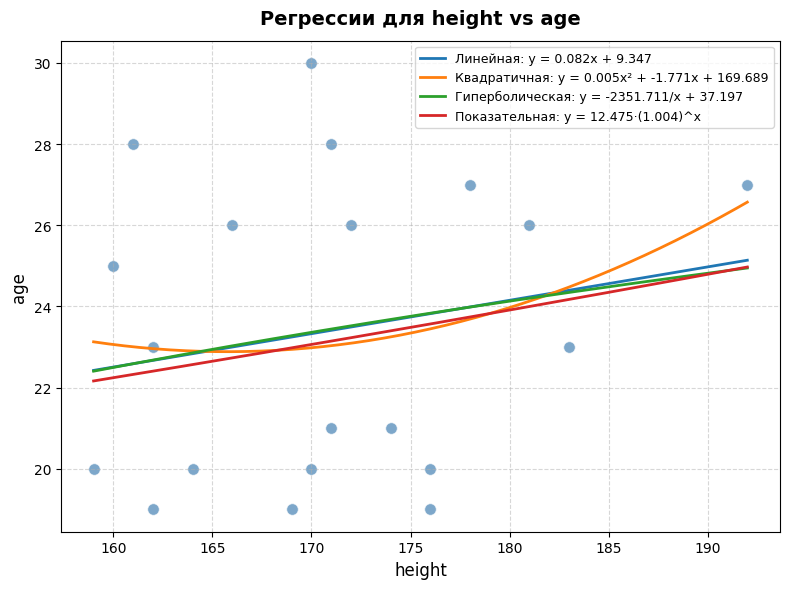

In [32]:
plot_regressions(my_df, first_column, second_column)